In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [3]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
# Read
mod1 = pd.read_csv('data/decennial_2020_nov8GAN.csv')[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_decennial(mod1)
mod2_tagged = process_ppp(mod2)
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged, agg_by_tag=True)

# Sample
num_samples = min(mod1.shape[0], 2000)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Generate Joint Embedding

In [5]:
joint_embedding = joint_embed(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
)

use random seed: 666
Shape of Raw data
Dataset 0: (462, 6)
Dataset 1: (462, 9)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:1.8336 alpha:6.3223
epoch:[200/2000] err:0.3688 alpha:1.2739
epoch:[300/2000] err:0.4019 alpha:1.3945
epoch:[400/2000] err:0.4221 alpha:1.4757
epoch:[500/2000] err:0.4373 alpha:1.5433
epoch:[600/2000] err:0.4496 alpha:1.6037
epoch:[700/2000] err:0.4597 alpha:1.6596
epoch:[800/2000] err:0.4678 alpha:1.7122
epoch:[900/2000] err:0.4742 alpha:1.7622
epoch:[1000/2000] err:0.4790 alpha:1.8099
epoch:[1100/2000] err:0.4823 alpha:1.8556
epoch:[1200/2000] err:0.4841 alpha:1.8996
epoch:[1300/2000] err:0.4847 alpha:1.9419
epoch:[1400/2000] err:0.4844 alpha:1.9823
epoch:[1500/2000] err:0.4833 alpha:2.0208
epoch:[1600/2000] err:0.4816 alpha:2.0574
epoch:[1700/2000] err:0.4795 alpha:2.0920
epoch:[1800/2000] err:0.4771 alpha:2.1247
epoch:[1900/2000] err:0.4745 alpha:2.1555
epoch:[2000/2000] err:0.4718 a

# Visualize

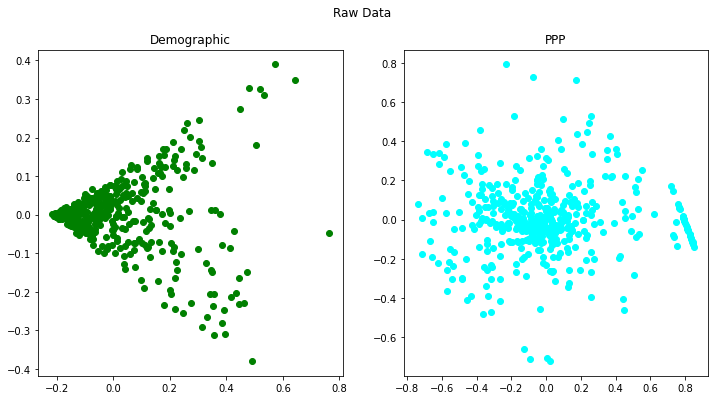

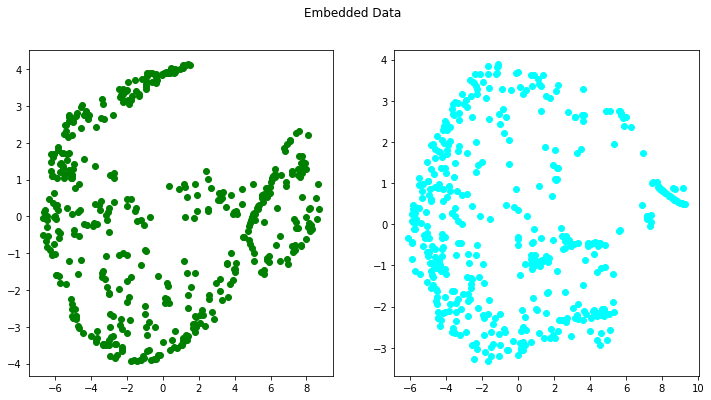

In [6]:
fig, axis = plt.subplots(figsize=(12, 6))
fig.suptitle('Raw Data')
plt.subplot(1, 2, 1)
plt.title('Demographic')
pca_plot(mod1_sample.to_numpy(), color='green')
plt.subplot(1, 2, 2)
plt.title('PPP')
pca_plot(mod2_sample.to_numpy(), color='cyan')

fig, axis = plt.subplots(figsize=(12, 6))
fig.suptitle('Embedded Data')
plt.subplot(1, 2, 1)
pca_plot(joint_embedding[0], color='green')
plt.subplot(1, 2, 2)
pca_plot(joint_embedding[1], color='cyan');